In [110]:

keyword_set = {"and","class","else","false","for","fun","if","nil","or","print","return","super","this","true","var","while",}


In [111]:
node_2_content = {
    "start":{"label":"start"},
    "(":{"label":"(","shape":"doublecircle"},
    ")":{"label":")","shape":"doublecircle"},
    "{":{"label":"}","shape":"doublecircle"},
    "}":{"label":"}","shape":"doublecircle"},
    ",":{"label":",","shape":"doublecircle"},
    ".":{"label":".","shape":"doublecircle"},
    "-":{"label":"-","shape":"doublecircle"},
    "+":{"label":"+","shape":"doublecircle"},
    ";":{"label":";","shape":"doublecircle"},
    "*":{"label":"*","shape":"doublecircle"},

    "!":{"label":"!"},
    "=":{"label":"="},
    ">":{"label":">"},
    "<":{"label":"<"},
    "!=":{"label":"!=","shape":"doublecircle"},
    "==":{"label":"==","shape":"doublecircle"},
    ">=":{"label":">=","shape":"doublecircle"},
    "<=":{"label":"<=","shape":"doublecircle"},
    "!_f":{"label":"!_f","shape":"doublecircle","color":"green"},
    "=_f":{"label":"=_f","shape":"doublecircle","color":"green"},
    ">_f":{"label":">_f","shape":"doublecircle","color":"green"},
    "<_f":{"label":"<_f","shape":"doublecircle","color":"green"},

    "/":{"label":"/"},
    "//":{"label":"//"},
    "/_f":{"label":"/_f","shape":"doublecircle","color":"green"},
    "//_f":{"label":"//_f","shape":"doublecircle"},
    
    " ":{"label":" ","shape":"doublecircle"},
    r"\\r":{"label":r"\\r","shape":"doublecircle"},
    r"\\t":{"label":r"\\t","shape":"doublecircle"},
    r"\\n":{"label":r"\\n","shape":"doublecircle"},
    
    "\"":{"label":"\""},
    "string":{"label":"string","shape":"doublecircle"},

    "number":{"label":"number"},
    "number_dot":{"label":"number_dot",},
    "number_f":{"label":"number_f","shape":"doublecircle"},
    "number_dot_f":{"label":"number_dot_f","shape":"doublecircle"},

    "alpha_array":{"label":"alpha_array"},
    "alpha_array_f":{"label":"alpha_array_f"},
    
    "variable":{"label":"variable","shape":"doublecircle","color":"yellow"},
    "identifier":{"label":"identifier","shape":"doublecircle","color":"yellow"},

    "error_state":{"label":"error_state","shape":"doublecircle","color":"red"},
}


In [112]:
start_set = {' ', '{', '"', '-', '+', '\\\\t', 'alpha_array', ',', '(', 'number', '/', '.', '=', '\\\\n', '*', ';', '<', '}', '>', ')', '\\\\r','!'}
node_2_node = {
    "start":[
        [i,"吃了:{}".format(i)] if i !="alpha_array" else [i,"吃了:{}".format("alpha")] for i in start_set 
    ],
    "!":[
        ["!=","吃了:{}".format("=")],
        ["!_f","看到前面不是{}".format("=")]
    ],
    "=":[
        ["==","吃了:{}".format("=")],
        ["=_f","看到前面不是{}".format("=")]
    ],
    "<":[
        ["<=","吃了:{}".format("=")],
        ["<_f","看到前面不是{}".format("=")]
    ],
    ">":[
        [">=","吃了:{}".format("=")],
        [">_f","看到前面不是{}".format("=")]
    ],

    "/":[
        ["//","吃了:{}".format("/")],
        ["/_f","看到前面不是{}".format("/")]
    ],

    "//":[
        ["//",r"吃了:非 \\n or 非 EOF"],
        ["//_f",r"吃了 \\n or EOF"]
    ],
    "\"":[
        ["\"",r"吃了:非 \" or 非 EOF"],
        ["string",r"吃了:\""],
        ["error_state","吃了 EOF"]
    ],

    "number":[
        ["number",r"吃了:[0-9]"],
        ["number_f",r"吃了:非[0-9|.]"],
        ["number_dot",r"吃了:."],
    ],

    "number_dot":[
        ["number_dot",r"吃了:[0-9]"],
        ["number_dot_f",r"吃了:非[0-9]"],
    ],

    "alpha_array":[
        ["alpha_array",r"吃了: 非 \\s or 非 EOF"],
        ["alpha_array_f",r"吃了: \\s or EOF"],
    ],

    "alpha_array_f":[
        ["identifier",r"是关键字"],
        ["variable",r"不是关键字"],
    ],

}

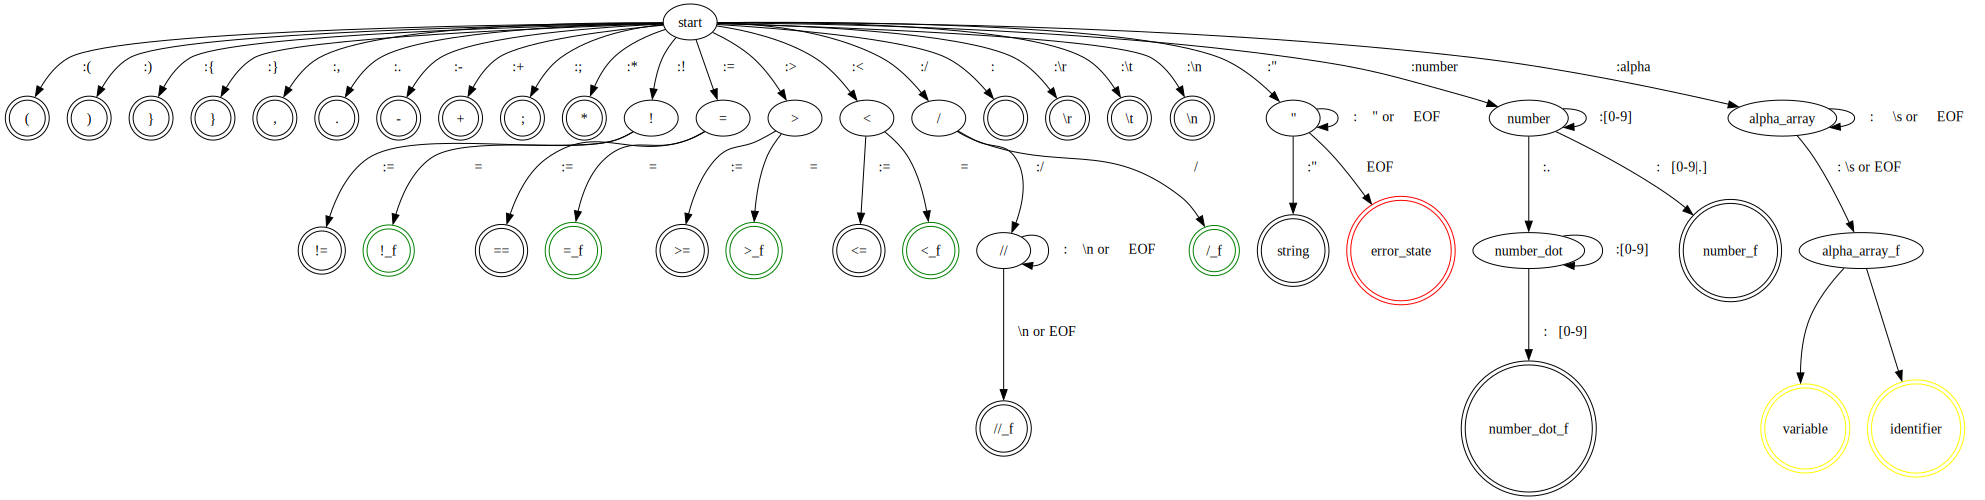

In [113]:
from graphviz import Digraph

dot = Digraph(comment='The Scanning state machine')


for i,j in node_2_content.items():
    dot.node(i, 
             label=j["label"],
             shape=j.get("shape",None),
             color = j.get("color",None)
             )

for i,j in node_2_node.items():
    for k in j:
        dot.edge(i, k[0], label=k[1])

dot


In [117]:
dot.render("词法分析状态机",format='svg')

'词法分析状态机.svg'